## Challenge Set 4
Topic: Linear Learning  
Date: July 25th, 2016  
Name: Graham Anderson  
Collaborators: Marc, Allison, Matt  

### Challenge 1
Generate (fake) data that is linearly related to log(x).
You are making this model up. It is of the form B0 + B1\*log(x) + epsilon. 
(You are making up the parameters.)
Simulate some data from this model.
Then fit two models to it:
quadratic (second degree polynomial)
logarithmic (log(x))
(The second one should fit really well, since it has the same form as the underlying model!)

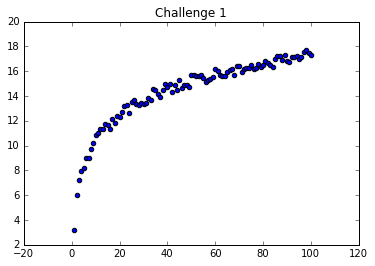

In [97]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
%matplotlib inline

epsilon = np.random.rand(100)
x = np.linspace(1,100,100)
y = 3 +  3* np.log(x) + epsilon

plt.scatter(x, y)
plt.title('Challenge 1')



### Challenge 2
Generate (fake) data from a model of the form B0 + B1*x + B2*x^2 + epsilon. (You are making up the parameters.)
Split the data into a training and test set. Fit a model to your training set. Calculate mean squared error on your training set. Then calculate it on your test set. (You could use sklearn.metrics.mean_squared_error.)

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import cross_validation as cv
from sklearn import preprocessing
from patsy import dmatrices,dmatrix
from sklearn.linear_model import LinearRegression
%matplotlib inline

epsilon = np.random.rand(100)
X = np.linspace(1,100,100)
X = X.reshape(-1,1)
y = 3 + 5*X + (8*X)**2 + epsilon

x_train, x_test, y_train, y_test = cv.train_test_split(X, y, test_size=0.25, random_state=1234)
model = LinearRegression().fit(x_train, y_train)


y_test_predicted = model.predict(x_test)
y_train_predicted = model.predict(x_train)
#plt.scatter(y, model.predict())


print("train mean square error: {0}".format(metrics.mean_squared_error(y_train, model.predict(x_train))))
print("test mean square error: {0}".format(metrics.mean_squared_error(y_test, model.predict(x_test))))






train mean square error: 2180690616.729163
test mean square error: 2639778555.3785176


### Challenge 3
For the data from two (above), try polynomial fits from 0th (just constant) to 7th order (highest term x^7). Over the x axis of model degree (8 points), plot:
training error
test error
R squared
AIC

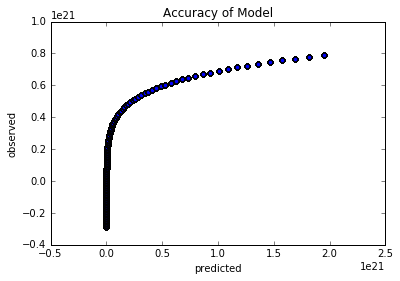

In [96]:
import numpy as np
from sklearn.mixture import GMM

epsilon = np.random.rand(100)
X = np.linspace(1,100,100)
X = X.reshape(-1,1)
y = 3 + 5*X + (6*X)**2 + (7*X)**3 + (8*X)**4 + (9*X)**5 + (10*X)**6 +(11*X)**7 + epsilon

x_train, x_test, y_train, y_test = cv.train_test_split(X, y, test_size=0.25, random_state=1234)
model = LinearRegression().fit(x_train, y_train)


model.predict(X)
plt.scatter(y, model.predict(X))

plt.title('Accuracy of Model')
plt.ylabel('observed')
plt.xlabel('predicted')

r_squared = model.score(X,y)
#aic = GMM.aic(X)

# print("R score: {0}".format(model.score(X,y)))
# print("train mean square error: {0}".format(metrics.mean_squared_error(y_train, model.predict(x_train))))
# print("train mean square error: {0}".format(metrics.mean_squared_error(y_test, model.predict(x_test))))


### Challenge 4
For the data from two (above), fit a model to only the first 5 of your data points (m=5). Then to first 10 (m=10). Then to first 15 (m=15). In this manner, keep fitting until you fit your entire training set. For each step, calculate the training error and the test error. Plot both (in the same plot) over m. This is called a learning curve.


In [47]:
epsilon = np.random.rand(100)
X = np.linspace(1,100,100)
X = X.reshape(-1,1)
y = 3 + 5*X + (8*X)**2 + epsilon

x_train, x_test, y_train, y_test = cv.train_test_split(X, y, test_size=0.25, random_state=1234)
model = LinearRegression().fit(x_train, y_train)


y_test_predicted = model.predict(x_test)
y_train_predicted = model.predict(x_train)
#plt.scatter(y, model.predict())

print("train mean square error: {0}".format(metrics.mean_squared_error(y_train, model.predict(x_train))))
print("test mean square error: {0}".format(metrics.mean_squared_error(y_test, model.predict(x_test))))


test_train_error= []




len(y)
#test_train_error




train mean square error: 2180690616.729163
test mean square error: 2639778555.3785176


100

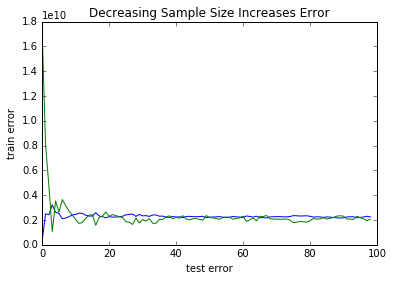

In [94]:
import matplotlib.pyplot as plt
test_train_error= []



for i in range(1,100):
    X = np.linspace(1,100, 5*i)
    X = X.reshape(-1,1)
    y = 3 + 5*X + (8*X)**2 + epsilon
    
   
    x_train, x_test, y_train, y_test = cv.train_test_split(X, y, test_size=0.25, random_state=1234)
    model = LinearRegression().fit(x_train, y_train)
    
    train_error = metrics.mean_squared_error(y_train, model.predict(x_train))
    test_error = metrics.mean_squared_error(y_test, model.predict(x_test))
    
    test_train_error.append([train_error, test_error])




plt.plot(test_train_error)
plt.title('Decreasing Sample Size Increases Error')
plt.ylabel('train error')
plt.xlabel('test error')

array([   1.  ,   25.75,   50.5 ,   75.25,  100.  ])